In [2]:
#pip install xlsxwriter

In [1]:
#pip install pandoc

In [2]:
#pip install dash

In [3]:
#pip install folium

# Sample Superstore

In today's dynamic business landscape, data-driven decision-making is paramount for staying competitive and maximizing operational efficiency. This project aims to conduct a comprehensive analysis of Using the sample superstore dataset from the tableau website (https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls), to derive valuable insights that can inform strategic business decisions. The dataset encompasses a range of features, including order details, customer information, and product-specific metrics, providing a holistic view of our sales operations.


#### Business Goal 1: Understand Sales Performance Over Time

What is the overall trend in sales over time?

How do sales vary by month or season?

Are there any notable trends or patterns in order and ship dates?


#### Business Goal 2: Optimize Geographic Sales Strategies

What are the top-selling regions or cities?

Is there a correlation between sales and the geographic location (region, city, state)?


#### Business Goal 3: Segment Customers for Targeted Marketing

How are sales distributed among different customer segments?

What types of products are popular among different customer segments?

How frequently do customers make purchases?


#### Business Goal 4: Maximize Product and Category Profitability

What are the most and least profitable products/categories?

Which products contribute the most to profit?

Are there specific products or categories where discounts are more effective?


#### Business Goal 5: Optimize Operational Efficiency

Does the choice of shipping mode affect sales or profit?

Are certain shipping modes more popular in specific regions?

How does discount impact sales and profit?


#### Business Goal 6: Understand Customer Behavior

What is the average order size and value?

How does the quantity of products ordered relate to sales and profit?

Do discounts correlate with higher sales but lower profit?

In [4]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import sklearn
import statsmodels.api as sm
import plotly.express as px
import folium
from scipy import stats
import xlsxwriter

# Enable inline plotting in Jupyter Notebooks
%matplotlib inline


ModuleNotFoundError: No module named 'xlsxwriter'

In [ ]:
#import dataset
df = pd.read_csv("superstore.csv")

In [ ]:
pip install xlsxwriter

In [2]:
#dataframe dimension
print(df.shape)
df.head(5)

NameError: name 'df' is not defined

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
print(df.tail())
df.shape

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [9]:
# Print the columns of the DataFrame
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [14]:
# Check for missing values
missing_values = df.isnull()

# Count the number of missing values in each column
missing_counts = missing_values.sum()

# Print the columns with missing values and their respective counts
print(missing_counts[missing_counts > 0])

Series([], dtype: int64)


In [15]:
#summary statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Business Goal 1: Understand Sales Performance Over Time

What is the overall trend in sales over time?


In [16]:
# Converting 'Order Date' to datetime and set it as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

In [17]:
# Resampling the data by month and calculate the total sales for each month
monthly_sales = df['Sales'].resample('M').sum()

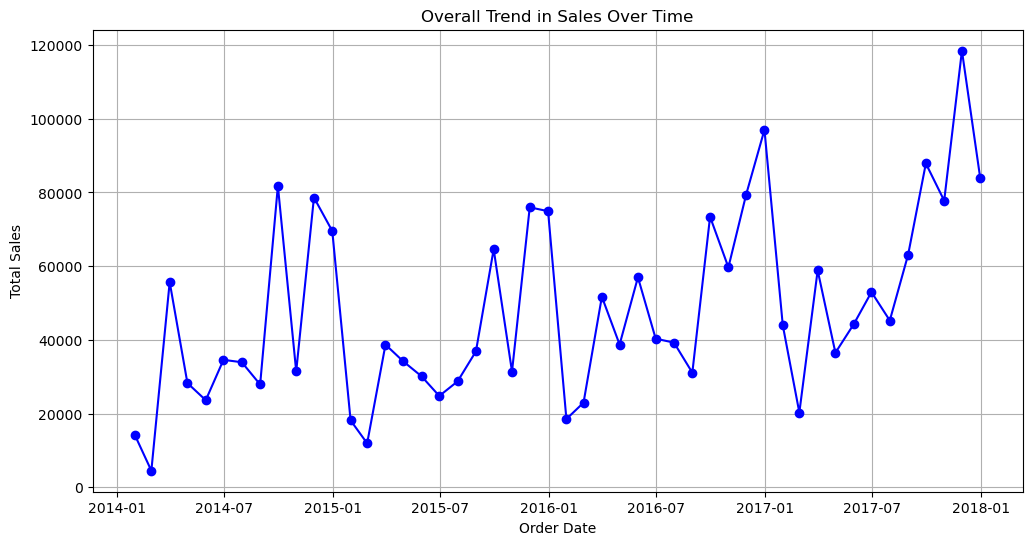

In [18]:
# Plotting the overall trend in sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Overall Trend in Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

The 'Order Date' is converted to a datetime format, and the dataset is indexed by the order date.
Monthly sales are calculated using resampling, and the trend is visualized using a line plot.
Sales Variation by Month or Season (1.2):

How do sales vary by month or season?

In [19]:
# Calculate mean and standard deviation of sales for each month
monthly_sales_mean = df['Sales'].resample('M').mean()
monthly_sales_std = df['Sales'].resample('M').std()

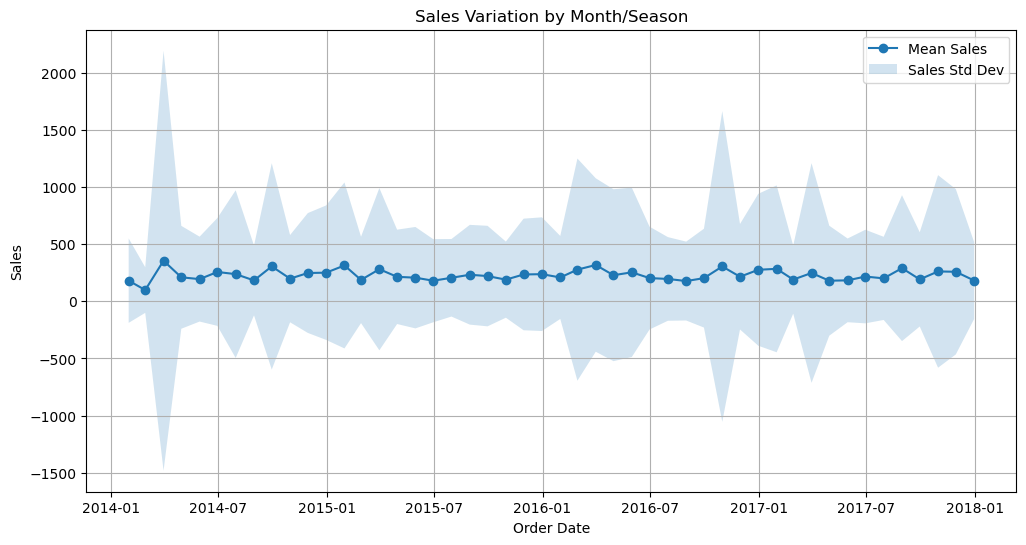

In [20]:
# Plotting sales variation by month and season
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_mean, marker='o', linestyle='-', label='Mean Sales')
plt.fill_between(monthly_sales_std.index, monthly_sales_mean - monthly_sales_std, monthly_sales_mean + monthly_sales_std, alpha=0.2, label='Sales Std Dev')
plt.title('Sales Variation by Month/Season')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


The mean and standard deviation of sales for each month are calculated and plotted to show variation.

Are there any notable trends or patterns in order and ship dates?

In [21]:
# Extracting relevant columns for order and ship dates
#order_ship_dates = df[['Order Date', 'Ship Date']]
# Resampling the data by month to get the count of orders and shipments for each month
#monthly_orders = order_ship_dates['Order Date'].resample('M').count()
#monthly_shipments = order_ship_dates['Ship Date'].resample('M').count()

In [22]:
# Plotting the number of orders and shipments over time
#plt.figure(figsize=(12, 6))
#plt.plot(monthly_orders, marker='o', linestyle='-', label='Orders', color='b')
#plt.plot(monthly_shipments, marker='o', linestyle='-', label='Shipments', color='r')
#plt.title('Number of Orders and Shipments Over Time')
#plt.xlabel('Order Date')
#plt.ylabel('Count')
#plt.legend()
#plt.grid(True)
#plt.show()

### Business Goal 2: Optimize Geographic Sales Strategies

What are the top-selling regions or cities?

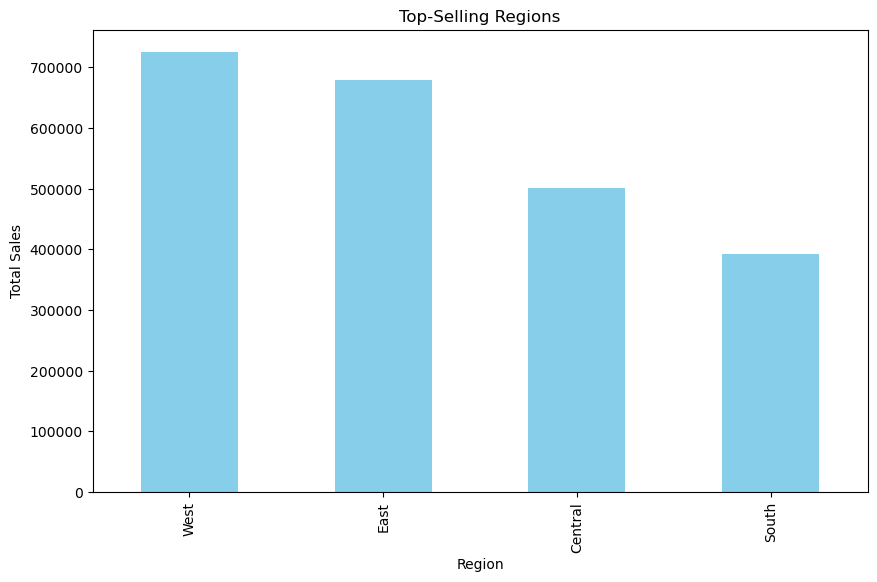

In [23]:
# Grouping the data by Region and calculate the total sales for each region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plotting the top-selling regions
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Top-Selling Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


The data is grouped by 'Region' and 'City,' and the total sales for each region and city are calculated.
Bar plots are created to visualize the top-selling regions and cities.

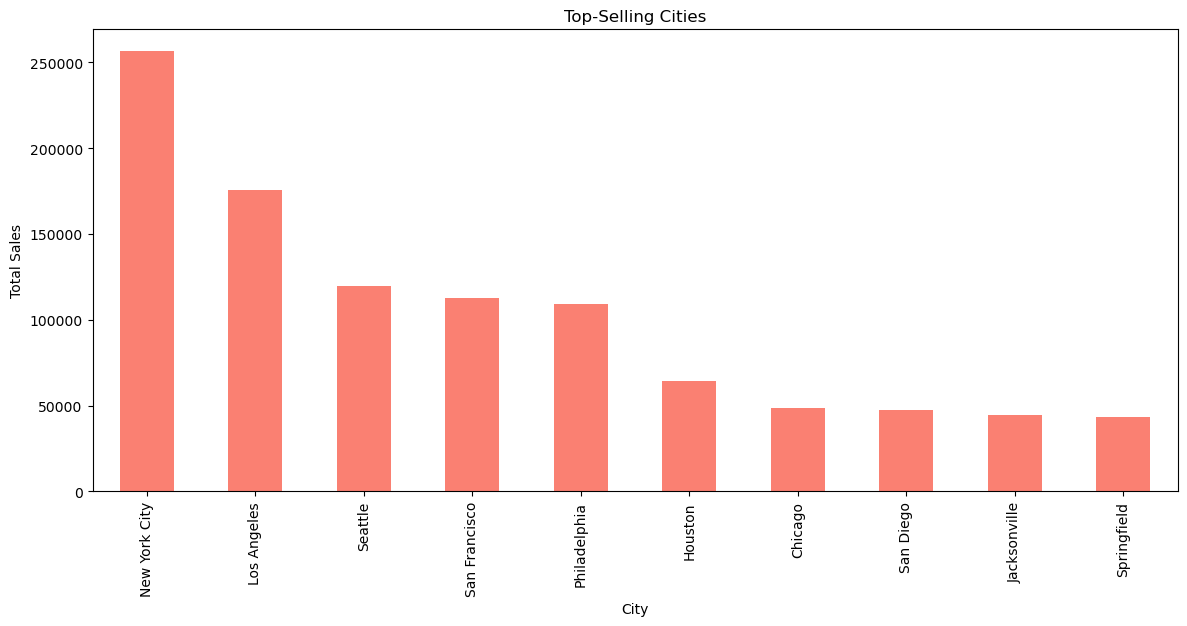

In [24]:
# Group the data by City and calculate the total sales for each city
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting the top-selling cities
plt.figure(figsize=(14, 6))
city_sales.plot(kind='bar', color='salmon')
plt.title('Top-Selling Cities')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

# 2.2 Is there a correlation between sales and the geographic location (region, city, state)?



Is there a correlation between sales and the geographic location (region, city, state)?

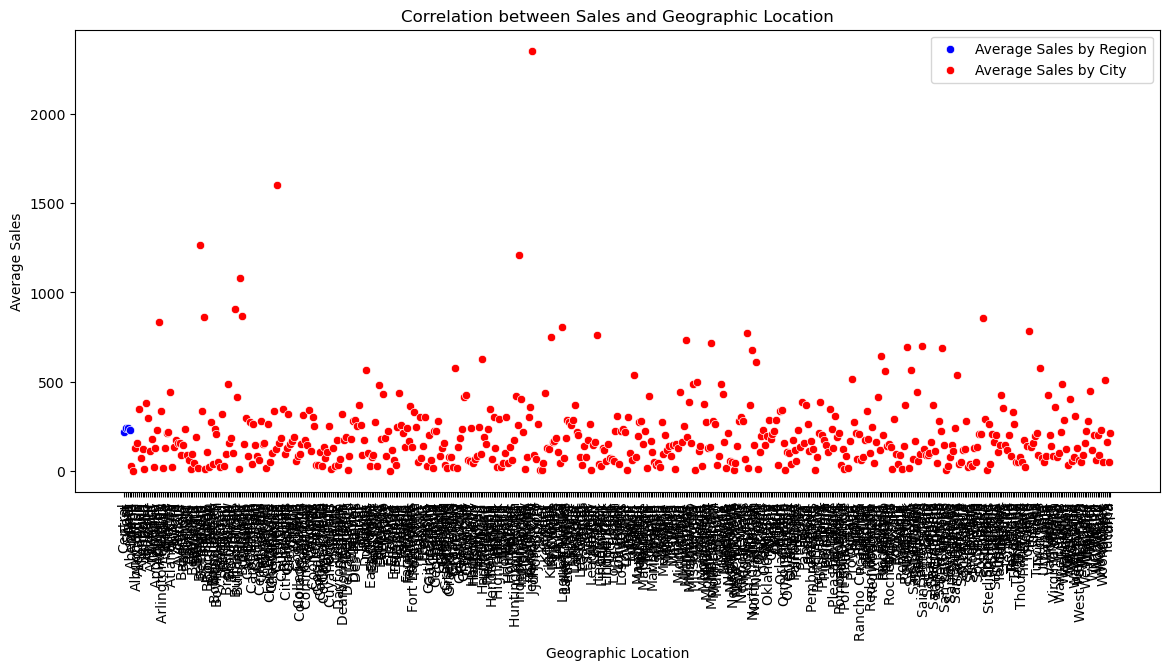

In [25]:
# Grouping the data by Region and calculate the average sales for each region
region_avg_sales = df.groupby('Region')['Sales'].mean()

# Grouping the data by City and calculate the average sales for each city
city_avg_sales = df.groupby('City')['Sales'].mean()

# Plotting the correlation between average sales and regions/cities
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Region', y='Sales', data=region_avg_sales.reset_index(), color='blue', label='Average Sales by Region')
sns.scatterplot(x='City', y='Sales', data=city_avg_sales.reset_index(), color='red', label='Average Sales by City')
plt.title('Correlation between Sales and Geographic Location')
plt.xlabel('Geographic Location')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)
plt.legend()
plt.show()

The data is grouped by 'Region' and 'City,' and the average sales for each region and city are calculated.
Scatter plots are created to visualize the correlation between average sales and regions/cities.

### Business Goal 3: Segment Customers for Targeted Marketing

How are sales distributed among different customer segments?


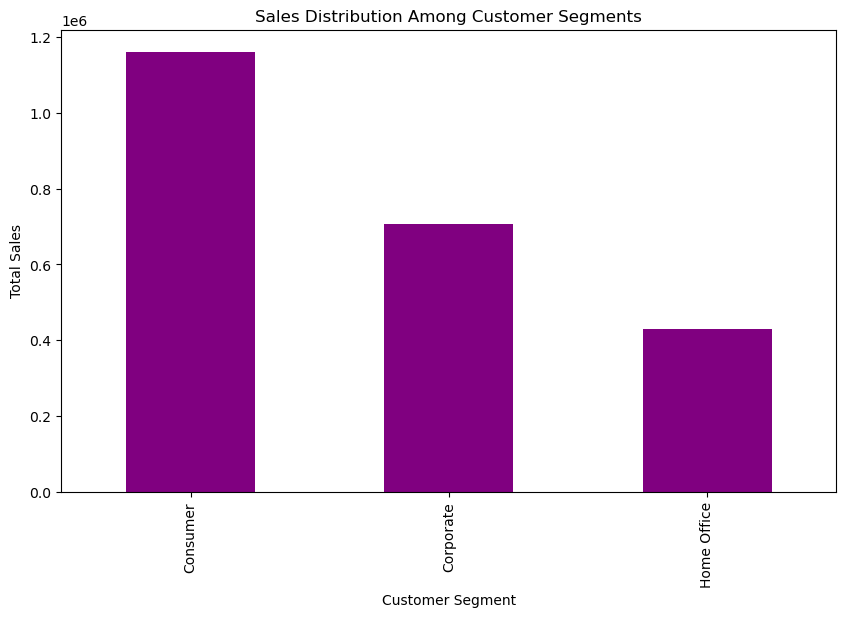

In [26]:
# Grouping the data by Segment and calculate the total sales for each segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# Plotting the sales distribution among different customer segments
plt.figure(figsize=(10, 6))
segment_sales.plot(kind='bar', color='purple')
plt.title('Sales Distribution Among Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()


The data is grouped by 'Segment,' and the total sales for each segment are calculated.
A bar plot is created to visualize the distribution of sales among different customer segments.

What types of products are popular among different customer segments?

<Figure size 1400x600 with 0 Axes>

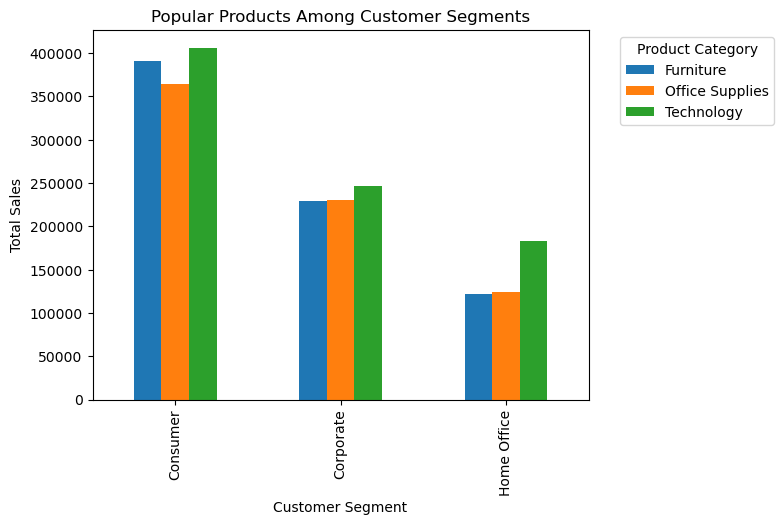

In [27]:
# Group the data by Segment and Category, and calculate the total sales for each category in each segment
segment_category_sales = df.groupby(['Segment', 'Category'])['Sales'].sum().unstack()

# Plotting the types of products that are popular among different customer segments
plt.figure(figsize=(14, 6))
segment_category_sales.plot(kind='bar', stacked=False)
plt.title('Popular Products Among Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The data is grouped by both 'Segment' and 'Category,' and the total sales for each category in each segment are calculated.
A stacked bar plot is created to visualize the types of products that are popular among different customer segments.

How frequently do customers make purchases?

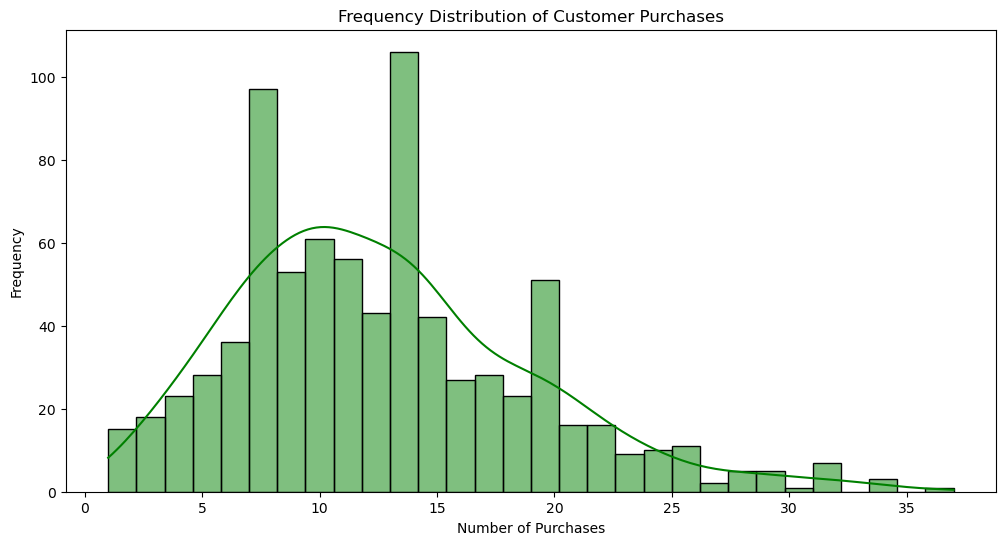

In [28]:
# Calculate the frequency of purchases for each customer (Customer ID)
purchase_frequency = df.groupby('Customer ID')['Order ID'].count()

# Plotting the frequency distribution of customer purchases
plt.figure(figsize=(12, 6))
sns.histplot(purchase_frequency, bins=30, color='green', kde=True)
plt.title('Frequency Distribution of Customer Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()


.

### Business Goal 4: Maximize Product and Category Profitability

What are the most and least profitable products/categories?

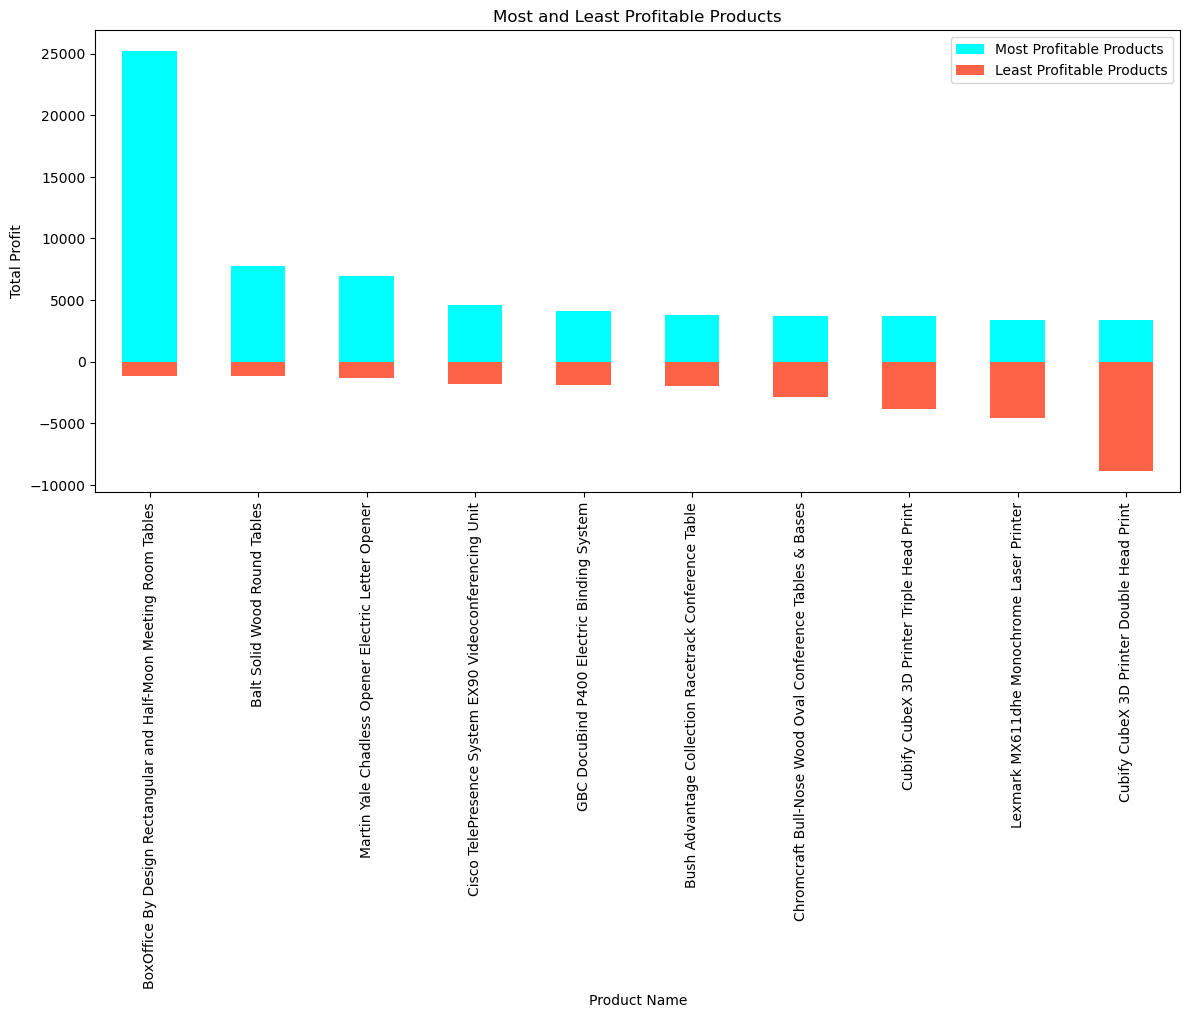

In [29]:
# Grouping the data by Product Name and calculate the total profit for each product
product_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)

# Plotting the most and least profitable products
plt.figure(figsize=(14, 6))
product_profit.head(10).plot(kind='bar', color='aqua', label='Most Profitable Products')
product_profit.tail(10).plot(kind='bar', color='tomato', label='Least Profitable Products')
plt.title('Most and Least Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.legend()
plt.show()

The data is grouped by 'Product Name' and 'Category,' and the total profit for each product and category is calculated.
Bar plots are created to visualize the most and least profitable products and product categories.

Which products contribute the most to profit?

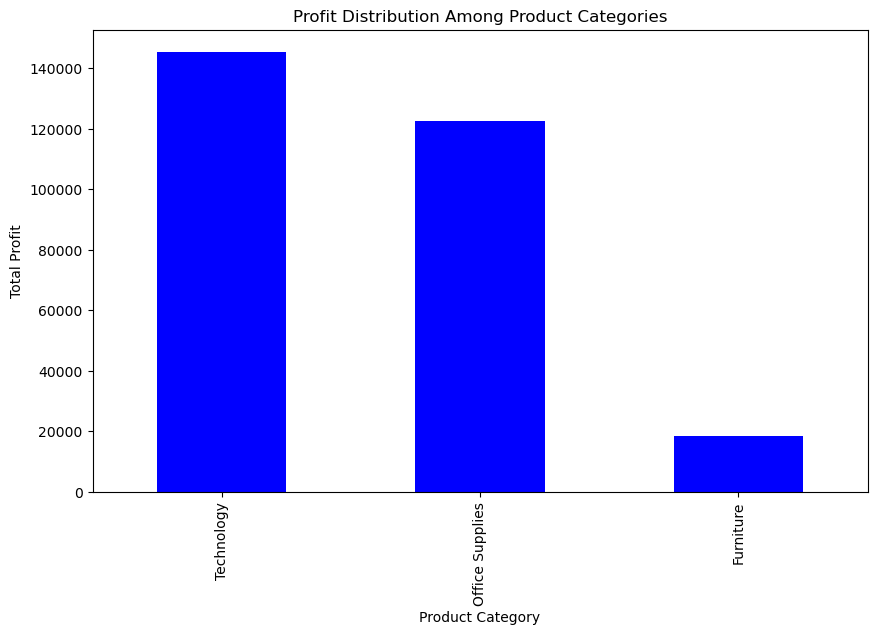

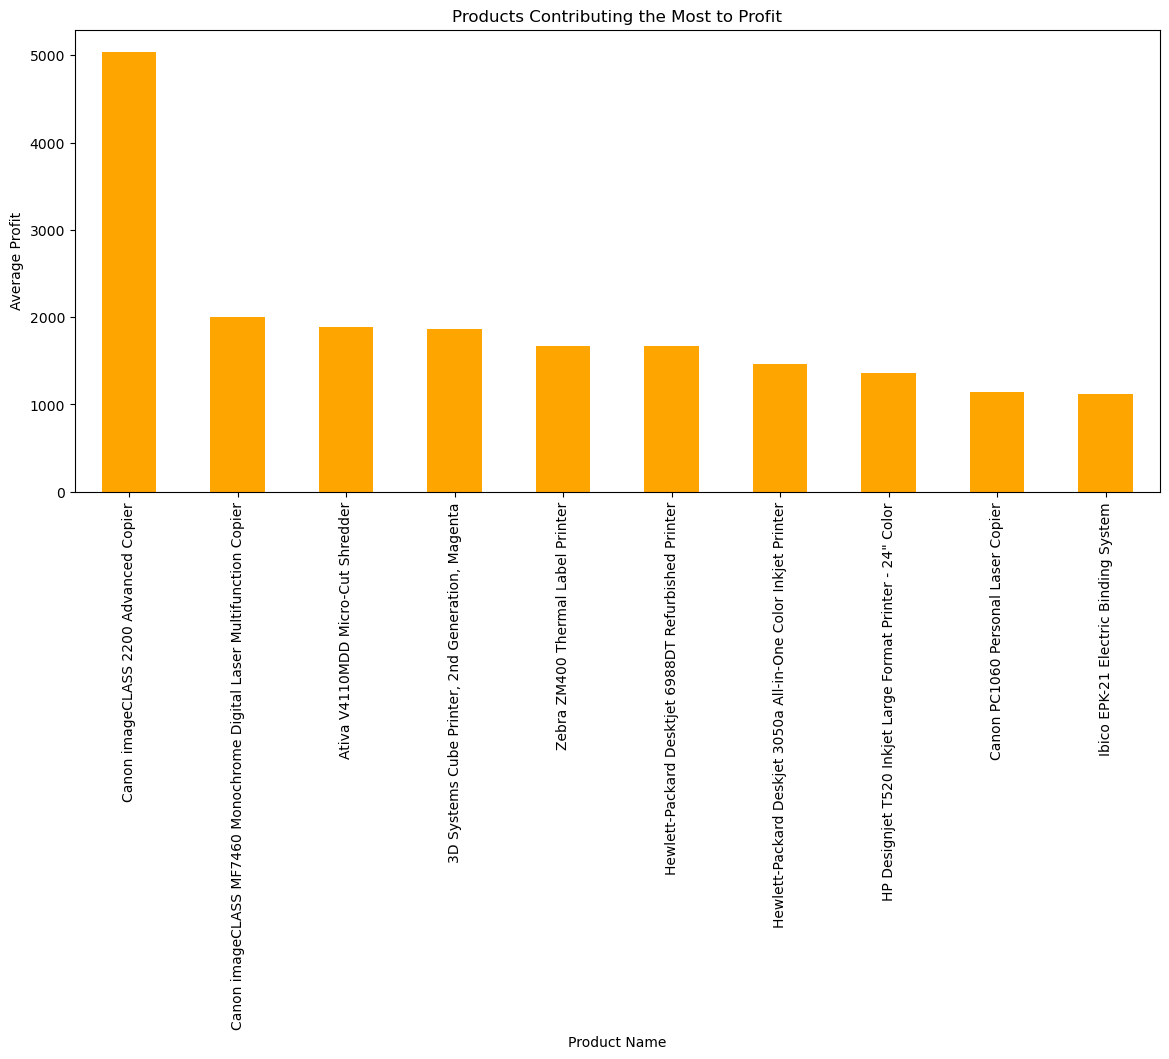

In [30]:
# Grouping the data by Category and calculate the total profit for each category
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

# Plotting the most and least profitable product categories
plt.figure(figsize=(10, 6))
category_profit.plot(kind='bar', color='blue')
plt.title('Profit Distribution Among Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()

# 4.2 Which products contribute the most to profit?

# Group the data by Product Name and calculate the average profit for each product
avg_product_profit = df.groupby('Product Name')['Profit'].mean()

# Plotting the products that contribute the most to profit
plt.figure(figsize=(14, 6))
avg_product_profit.sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Products Contributing the Most to Profit')
plt.xlabel('Product Name')
plt.ylabel('Average Profit')
plt.show()



The data is grouped by 'Product Name,' and the average profit for each product is calculated.
A bar plot is created to visualize the products that contribute the most to profit.

Are there specific products or categories where discounts are more effective?

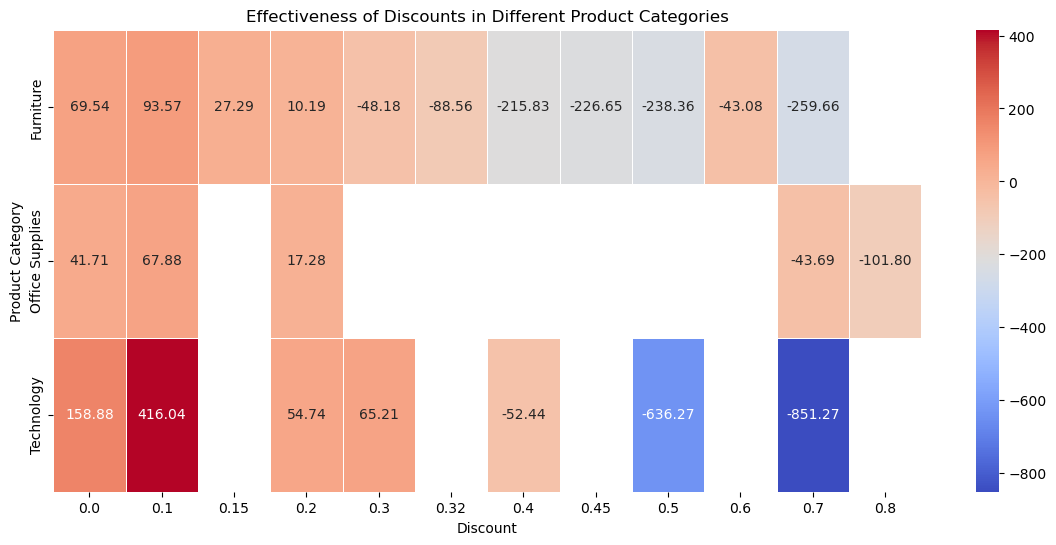

In [31]:
# Grouping the data by Category and Discount, and calculate the average profit for each category and discount level
category_discount_profit = df.groupby(['Category', 'Discount'])['Profit'].mean().unstack()

# Plotting the effectiveness of discounts in different product categories
plt.figure(figsize=(14, 6))
sns.heatmap(category_discount_profit, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Effectiveness of Discounts in Different Product Categories')
plt.xlabel('Discount')
plt.ylabel('Product Category')
plt.show()

The data is grouped by 'Category' and 'Discount,' and the average profit for each category and discount level is calculated.
A heatmap is created to visualize the effectiveness of discounts in different product categories.

### Business Goal 5: Optimize Operational Efficiency

Does the choice of shipping mode affect sales or profit?

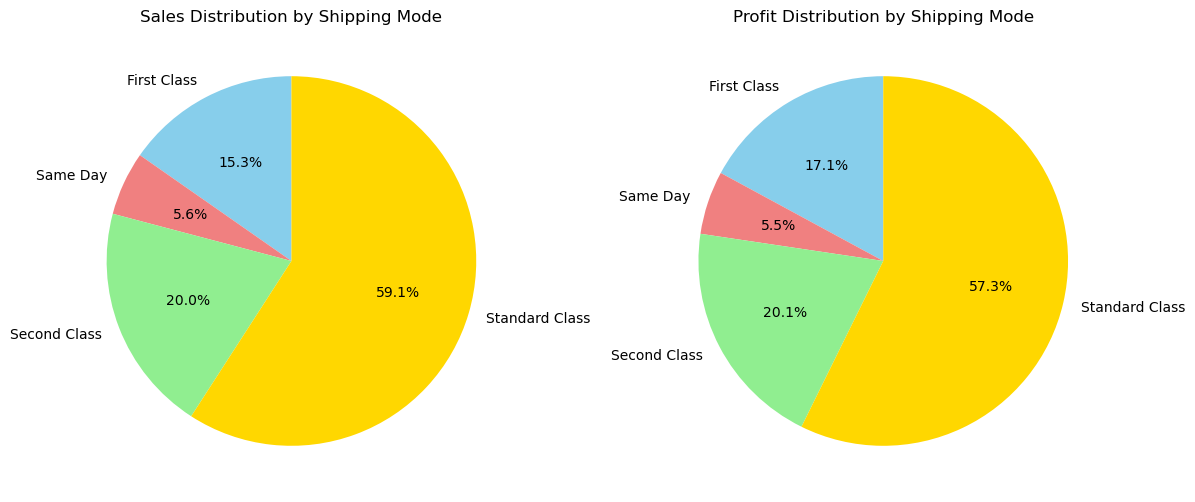

In [32]:
# Grouping the data by Shipping Mode and calculate the total sales and profit for each mode
shipping_mode_performance = df.groupby('Ship Mode')[['Sales', 'Profit']].sum()

# Plotting the impact of shipping mode on sales and profit
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sales by Shipping Mode
axes[0].pie(shipping_mode_performance['Sales'], labels=shipping_mode_performance.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[0].set_title('Sales Distribution by Shipping Mode')

# Profit by Shipping Mode
axes[1].pie(shipping_mode_performance['Profit'], labels=shipping_mode_performance.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[1].set_title('Profit Distribution by Shipping Mode')

plt.show()

The data is grouped by 'Ship Mode,' and the total sales and profit for each mode are calculated.
Pie charts are created to visualize the distribution of sales and profit among different shipping modes.

Are certain shipping modes more popular in specific regions?

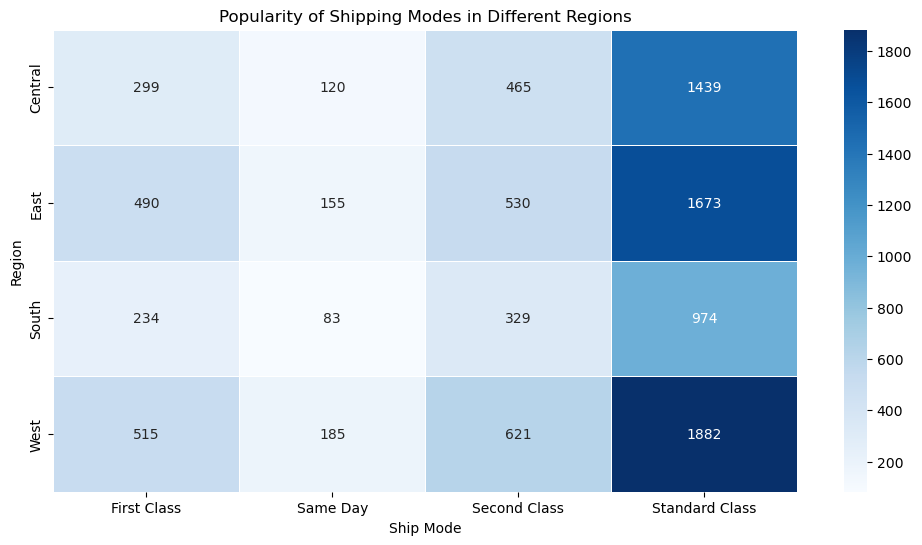

In [33]:
# Creating a cross-tabulation between Region and Ship Mode
region_ship_mode_count = pd.crosstab(df['Region'], df['Ship Mode'])

# Plotting the popularity of shipping modes in different regions
plt.figure(figsize=(12, 6))
sns.heatmap(region_ship_mode_count, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Popularity of Shipping Modes in Different Regions')
plt.xlabel('Ship Mode')
plt.ylabel('Region')
plt.show()

A cross-tabulation is created between 'Region' and 'Ship Mode' to visualize the popularity of shipping modes in different regions using a heatmap.

How does discount impact sales and profit?

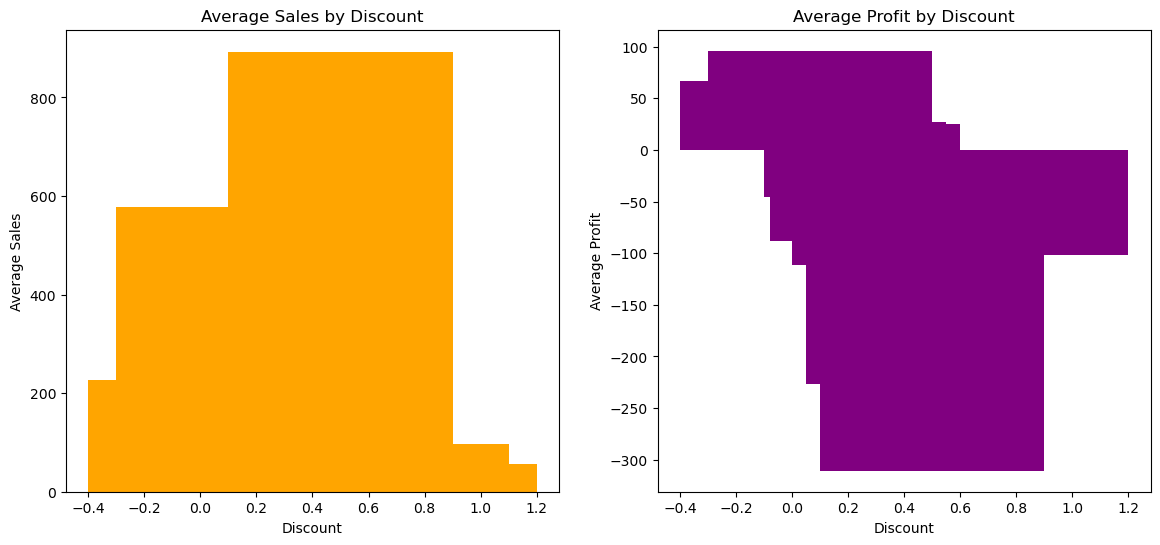

In [34]:
# Grouping the data by Discount and calculate the average sales and profit for each discount level
discount_performance = df.groupby('Discount')[['Sales', 'Profit']].mean()

# Plotting the impact of discount on sales and profit
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Average Sales by Discount
axes[0].bar(discount_performance.index, discount_performance['Sales'], color='orange')
axes[0].set_title('Average Sales by Discount')
axes[0].set_xlabel('Discount')
axes[0].set_ylabel('Average Sales')

# Average Profit by Discount
axes[1].bar(discount_performance.index, discount_performance['Profit'], color='purple')
axes[1].set_title('Average Profit by Discount')
axes[1].set_xlabel('Discount')
axes[1].set_ylabel('Average Profit')

plt.show()


The data is grouped by 'Discount,' and the average sales and profit for each discount level are calculated.
Bar plots are created to visualize the impact of discount on average sales and profit.

### Business Goal 6: Understand Customer Behavior

What is the average order size and value?

In [35]:
# Calculating the average order size (number of items per order)
average_order_size = df.groupby('Order ID')['Quantity'].sum().mean()

# Calculating the average order value
average_order_value = df.groupby('Order ID')['Sales'].sum().mean()

print(f"Average Order Size: {average_order_size:.2f} items")
print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Size: 7.56 items
Average Order Value: $458.61


This means that, on average, each order consists of approximately 7.56 items, and the average order value is $458.61. These metrics provide insights into the typical size and value of orders, which can be valuable for understanding customer behavior and making informed business decisions.

How does the quantity of products ordered relate to sales and profit?

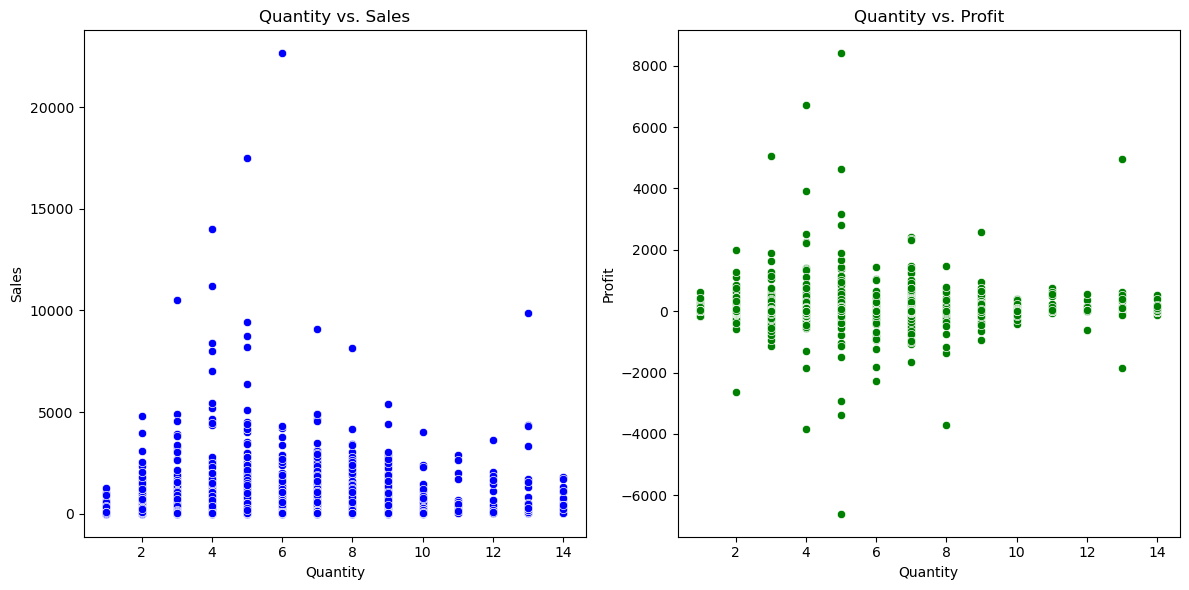

In [36]:
# Scatter plot to visualize the relationship between quantity ordered and sales/profit
plt.figure(figsize=(12, 6))

# Quantity vs. Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='Quantity', y='Sales', data=df, color='blue')
plt.title('Quantity vs. Sales')
plt.xlabel('Quantity')
plt.ylabel('Sales')

# Quantity vs. Profit
plt.subplot(1, 2, 2)
sns.scatterplot(x='Quantity', y='Profit', data=df, color='green')
plt.title('Quantity vs. Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

Scatter plots are created to visualize the relationship between the quantity of products ordered and sales/profit.

Do discounts correlate with higher sales but lower profit?

In [37]:
# Calculate the correlation between discount and sales/profit
correlation_discount_sales = df['Discount'].corr(df['Sales'])
correlation_discount_profit = df['Discount'].corr(df['Profit'])

print(f"Correlation between Discount and Sales: {correlation_discount_sales:.2f}")
print(f"Correlation between Discount and Profit: {correlation_discount_profit:.2f}")


Correlation between Discount and Sales: -0.03
Correlation between Discount and Profit: -0.22


The correlation between discounts and sales/profit is calculated and printed.

### Correlation between Discount and Sales (-0.03):

The correlation between the discount given and the sales amount is close to zero (-0.03). This suggests a very weak negative correlation, indicating that there is little to no linear relationship between the discount and the total sales.

### Correlation between Discount and Profit (-0.22):

The correlation between the discount given and the profit is also negative but slightly stronger (-0.22). This suggests a weak negative correlation, implying that, on average, as discounts increase, profit tends to decrease, but the relationship is not very strong.

In [38]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame

# Initialize the Dash app
app = dash.Dash(__name__)

# Business Goal 1: Sales Performance Over Time
monthly_sales = df.resample('M').agg({'Sales': 'sum'}).reset_index()
fig1 = px.line(monthly_sales, x='Order Date', y='Sales', title='Monthly Sales Over Time')

# Business Goal 2: Geographic Sales Strategies
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
fig2 = px.bar(region_sales, x='Region', y='Sales', title='Sales Distribution by Region')

# Business Goal 3: Customer Segmentation
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
fig3 = px.pie(segment_sales, values='Sales', names='Segment', title='Sales Distribution by Customer Segment')

# Business Goal 4: Product and Category Profitability
product_profit = df.groupby('Product Name')['Profit'].sum().reset_index()
fig4 = px.bar(product_profit.head(10), x='Product Name', y='Profit', title='Top 10 Profitable Products')

# Business Goal 5: Operational Efficiency
shipping_mode_performance = df.groupby('Ship Mode')[['Sales', 'Profit']].sum().reset_index()
fig5 = px.pie(shipping_mode_performance, values='Sales', names='Ship Mode', title='Sales Distribution by Shipping Mode')

# Business Goal 6: Customer Behavior
quantity_sales_profit = df.groupby('Quantity')[['Sales', 'Profit']].mean().reset_index()
fig6 = px.scatter(quantity_sales_profit, x='Quantity', y='Sales', size='Profit', title='Quantity vs. Sales and Profit')

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Sales Analysis Dashboard'),

    dcc.Graph(
        id='sales-over-time',
        figure=fig1
    ),

    dcc.Graph(
        id='sales-by-region',
        figure=fig2
    ),

    dcc.Graph(
        id='sales-by-segment',
        figure=fig3
    ),

    dcc.Graph(
        id='top-10-profitable-products',
        figure=fig4
    ),

    dcc.Graph(
        id='sales-by-shipping-mode',
        figure=fig5
    ),

    dcc.Graph(
        id='quantity-vs-sales-profit',
        figure=fig6
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
